In [0]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import pickle

In [107]:
pip install rfpimp

     |████████████████████████████████| 153kB 3.9MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10260 sha256=57dff6b75e9739de307d7436ba246b6887140a2d2ab245b3814004464c758d30
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.3-cp36-none-any.whl size=22699 sha256=0171e7962cb9a4ef91565b5ffe40fa8007380a78708821d2baeb77cc967173c6
  Stored in directory: /root/.cache/pip/wheels/91/3b/c3/9dcafed446985efb9008de84b720ddf003ac963e6807e8ad15
Successfully built rfpimp stratx


In [0]:
df = pd.read_csv('/content/drive/My Drive/MLGraz project/cleanup.csv')

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,4.857,5191.0,no


**Drop unwanted data**

In [0]:
df = df.drop(labels=['Unnamed: 0' , 'default'], axis=1)

**Rename last column to Deposit**

In [0]:
df.columns = list(df.columns.values[:-1]) + ['deposit']

**Deposit- Has the client subscribed a term deposit? (binary:"yes","no")**

In [0]:
df['deposit'] = df['deposit'].map({'yes':1 , 'no':0})

**Encoding categorical data**

In [0]:
categorical_columns = ["job","marital","education","housing","loan","contact","previous","poutcome"]

**Set data type of Ordinal/Nominal variables to category**

In [0]:
for col in categorical_columns:
  df[col] = df[col].astype('category')
  

**Create One Hot encoding for categorical features**

In [0]:
df_dummy = pd.get_dummies(df[categorical_columns], drop_first=True)

In [0]:
df_numeric = df.drop(labels=(categorical_columns), axis=1)

In [11]:
merged = pd.concat([df_dummy, df_numeric], join='outer', axis=1)
merged.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,poutcome_nonexistent,poutcome_success,age,month,day_of_week,duration,campaign,pdays,emp.var.rate,euribor3m,nr.employed,deposit
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,56,may,mon,261,1,999,1.1,4.857,5191.0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,57,may,mon,149,1,999,1.1,4.857,5191.0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,37,may,mon,226,1,999,1.1,4.857,5191.0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,40,may,mon,151,1,999,1.1,4.857,5191.0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,56,may,mon,307,1,999,1.1,4.857,5191.0,0


In [12]:
merged.shape

(41188, 45)

In [13]:
df = merged.drop(labels=['month','day_of_week'], axis=1)

df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,emp.var.rate,euribor3m,nr.employed,deposit
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,56,261,1,999,1.1,4.857,5191.0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,57,149,1,999,1.1,4.857,5191.0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,37,226,1,999,1.1,4.857,5191.0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,40,151,1,999,1.1,4.857,5191.0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,56,307,1,999,1.1,4.857,5191.0,0


**Split Input and Output**

In [0]:
X = df.drop('deposit', axis=1)

In [0]:
y = df[['deposit']]

**Desicion tree model**

In [0]:
model = DecisionTreeClassifier()

In [77]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Train Test Split**

In [0]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size= 0.33, random_state = 50)

In [79]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Evaluation**

In [80]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
accuracy_score(y_test, y_pred)

0.8887662767600971

In [84]:
precision_score(y_test, y_pred)

0.5114649681528662

In [83]:
recall_score(y_test, y_pred)

0.5187338501291989

In [82]:
f1_score(y_test, y_pred)

0.5150737652341244

**K-Folds cross validation**

In [0]:
model_k = DecisionTreeClassifier()

In [0]:
scores = cross_validate(model_k, X_train,y_train, cv=3, scoring=('accuracy','average_precision','recall','f1'))

In [87]:
scores

{'fit_time': array([0.1211617 , 0.10266304, 0.10044026]),
 'score_time': array([0.0221467 , 0.0173285 , 0.01714563]),
 'test_accuracy': array([0.89183607, 0.8929115 , 0.89247663]),
 'test_average_precision': array([0.32579018, 0.3237993 , 0.33299334]),
 'test_f1': array([0.52232357, 0.5192777 , 0.53061224]),
 'test_recall': array([0.52764306, 0.51650485, 0.54219205])}

**save model**

In [0]:
pickle.dump(model_k,open('../content/drive/My Drive/MLGraz project/DesicionTree.model','wb'))

**Random Forest**

In [0]:
rfc_f = RandomForestClassifier()

In [0]:
rfc_scores = cross_validate(rfc_f,X_train, y_train.values.ravel(), cv=3,scoring=('accuracy','average_precision','recall','f1'))

In [115]:
rfc_scores

{'fit_time': array([1.76237726, 1.7495153 , 1.71761131]),
 'score_time': array([0.32835793, 0.3282876 , 0.33005214]),
 'test_accuracy': array([0.91140341, 0.91041531, 0.91193738]),
 'test_average_precision': array([0.62116144, 0.63065678, 0.64233163]),
 'test_f1': array([0.5377198 , 0.52914286, 0.53233256]),
 'test_recall': array([0.45974782, 0.44951456, 0.4471387 ])}

**Save model**

In [0]:
pickle.dump(rfc_f,open('../content/drive/My Drive/MLGraz project/RandomForestClassifier.model','wb'))

**Comparing Random Forest and Decision Tree**

In [0]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:],columns=['Decision Tree', 'Random Forest'])


In [0]:
for key in report.index:
  report.loc[key] = [np.mean(scores[key]),np.mean(rfc_scores[key])]

In [0]:
report['Improvement'] = report['Random Forest'] - report['Desicion Tree']
report *=100
report = report.astype(float).round(1)

In [75]:
report

,Desicion Tree,Random Forest,Improvement
test_accuracy,89.3,91.2,2.0
test_average_precision,32.5,63.1,30.6
test_recall,52.2,46.5,-5.7
test_f1,52.1,54.3,2.1


**Regressor model**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
regr = LogisticRegression()

In [126]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
r_scores = regr.score(X_test,y_test)

In [133]:
r_scores

0.9046568086515118

In [129]:
regr.coef_

array([[-9.83170384e-02, -1.17701087e-02,  1.92203764e-03,
        -2.24074962e-03,  3.57395871e-02, -4.99664096e-03,
        -2.51895643e-02,  3.40725031e-02,  1.09115442e-02,
         5.91005464e-03,  1.56596604e-03, -5.70662214e-02,
         7.05698346e-02, -5.89197646e-04, -1.19968776e-02,
        -5.29319096e-02, -2.17964423e-02,  2.66211917e-04,
         9.49422416e-03,  8.14801811e-02,  1.60880148e-02,
         2.43133005e-03,  5.46054294e-03,  2.43133005e-03,
        -1.62789620e-02, -6.40641723e-02, -4.84118914e-02,
         6.65924933e-03,  5.34905737e-03, -1.71643088e-03,
         1.17686299e-03,  1.52227361e-04,  0.00000000e+00,
         4.21386364e-02,  1.15808236e-02,  8.27392207e-03,
         4.53774270e-03,  2.31482378e-02, -2.01816565e-03,
        -3.01454349e-01, -3.43930735e-01, -2.67005475e-04]])

In [130]:
regr.intercept_

array([0.00534915])

**Metrics**

In [0]:
from sklearn import metrics

In [139]:
metrics.accuracy_score(y_pred, y_test)

0.8887662767600971

**Feature Importance**

In [108]:
import rfpimp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



In [0]:
rfc = RandomForestClassifier()

In [110]:
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
importance = rfpimp.importances(rfc,X_test,y_test)

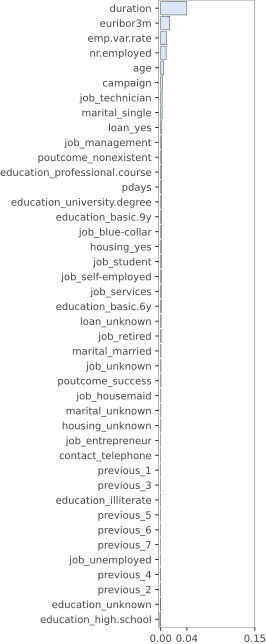

In [112]:
rfpimp.plot_importances(importance)